In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 1. Average Mobility Regular People

Output: Average distance that people are likely to move from their residences.

In [2]:
df_descartes_counties = pd.read_csv('../data/interim/mobility/m50_max_counties.csv')
df_descartes_counties_percent = pd.read_csv('../data/interim/mobility/m50_percent_counties.csv')

In [3]:
df_descartes_counties.head(2)

,COUNTY,NAME,country_code,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30
0,1001,Autauga County,US,49.0,100.0,95.0,95.0,100.0,116.0,79.0,...,80.0,79.0,91.0,47.0,39.0,66.0,76.0,76.0,65.0,91.0
1,1003,Baldwin County,US,81.0,100.0,95.0,90.0,102.0,114.0,95.0,...,86.0,86.0,99.0,75.0,69.0,80.0,82.0,64.0,67.0,93.0


In [4]:
df_descartes_counties_percent.head(2)

,COUNTY,NAME,country_code,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,...,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30
0,1001,Autauga County,US,7.194,14.587,13.865,13.880,14.659,17.066,11.562,...,11.757,11.57,13.286,6.866,5.692,9.670,11.121,11.131,9.503,13.419
1,1003,Baldwin County,US,9.780,12.042,11.481,10.879,12.381,13.789,11.481,...,10.370,10.37,11.964,9.052,8.372,9.642,9.926,7.776,8.138,11.214


In [5]:
l = df_descartes_counties.NAME.unique()

# for name in l:
#     print(name)
#Los Angeles County, San Diego County, San Francisco County , Miami-Dade County, Dallas County, New York County

In [6]:
def indexed_mobility_average_person(location):
    df_index = df_descartes_counties[df_descartes_counties.NAME == location].loc[:, '2020-03-01':]

    df_index = pd.melt(df_index, var_name='date', value_name='index')
    df_index['date'] = pd.to_datetime(df_index['date'])
    df_index['city'] = location
    
    f, ax = plt.subplots(figsize=(15.5, 4.5))
    _ = plt.rcParams.update({'font.size': 16})
    _ = sns.lineplot(data=df_index, x='date', y='index')
    _ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline', lw=0.5)
    _ = plt.xlabel('Date')
    _ = plt.ylabel('Indexed mobility')
    _ = plt.title('Indexed mobility for a regular person \n'+location)   

In [7]:
def mobility_average_person(location):
    df_kms= df_descartes_counties_percent[df_descartes_counties_percent.NAME == location].loc[:, '2020-03-01':]

    df_kms = pd.melt(df_kms, var_name='date', value_name='kms')
    df_kms['date'] = pd.to_datetime(df_kms['date'])
    df_kms['city'] = location
    
    f, ax = plt.subplots(figsize=(15.5, 4.5))
    _ = plt.rcParams.update({'font.size': 16})
    _ = sns.lineplot(data=df_kms, x='date', y='kms')
    _ = plt.xlabel('Date')
    _ = plt.ylabel('Kms')
    _ = plt.title('Mobility for a regular person \n'+location)   

In [8]:
location = 'San Francisco County'

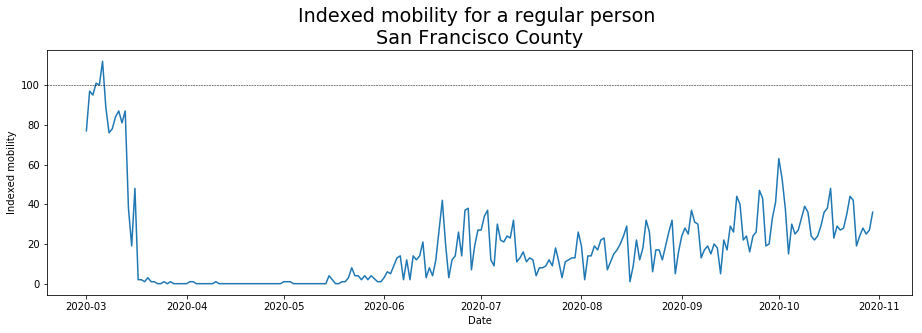

In [9]:
indexed_mobility_average_person(location)

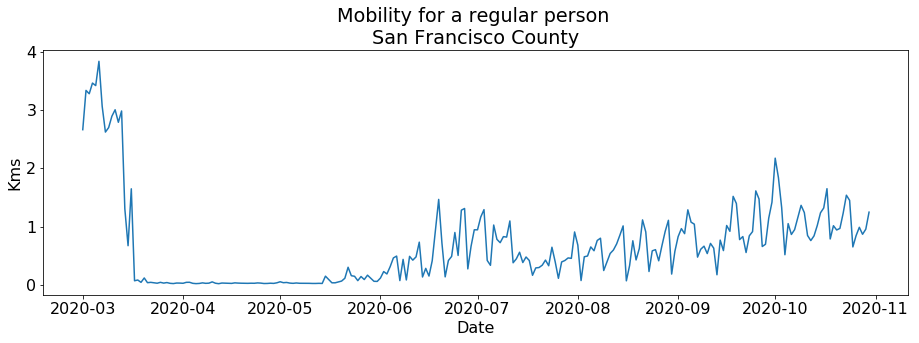

In [10]:
mobility_average_person(location)

People are moving less than 2kms daily in San Francisco county. Look for residential zones and recreational zones mobility to determine how likely are people to go there walking or driving. Compare walking and driving trends to decide if they are walking or driving more. Probably people are able to walk if the businesses are between a radio of 2 kms from their residences. The use of transit still low, and that could mean:

1. For high income residences and long distance delivery is the best option.
2. For medium income residences and medium/long distances, delivery is the best option.
3. Curbside works for high income if they drive to the businesses
4. Curbside works for and high medium incomes only if the businesses are close to the residences (into a radio of 2kms).

**For instances**, financial district concentrates some of the most expensives restaurants in the city. Also, those restaurants have higher ranking and number of reviews (popularity). Offices areas have less traffic that usual. Restaurants from financial district must do delivery --> Check % doing that.

Follow-up: Decomposition of the time-serie to get the trend curve***.

### 2. Mobility to specific venues

#### Using Foursquare Data

In [11]:
df_foursquare_dma = pd.read_csv('../data/interim/mobility/foursquare_dma.csv', index_col=0)

In [12]:
location = 'SanFrancisco-Oakland-SanJose'

In [13]:
def mobility_venues_foursquare(df, location):
    df = df[[location,'class']]
    df.index = pd.to_datetime(df.index)
    
    temp = df.groupby('class').count().reset_index()
    max_data = max(temp[location])
    #only display historical data with 80% of the longer serie
    valid_venues = list(temp[temp[location] >= 0.8*max_data]['class'])
    
    f, ax = plt.subplots(figsize=(15.5, 4.5))

    for venue in valid_venues:
        temp = df[df['class'] == venue].loc[:, location]
        _ = sns.lineplot(data=temp, label=venue)
    
    _ = ax.legend(bbox_to_anchor=(1.05, 1.05))
    _ = plt.rcParams.update({'font.size': 16})
    _ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline', lw=0.5)
    _ = plt.xlabel('Date')
    _ = plt.ylabel('Indexed Mobility')
    _ = plt.title('Mobility trends to different venues in \n'+location)   

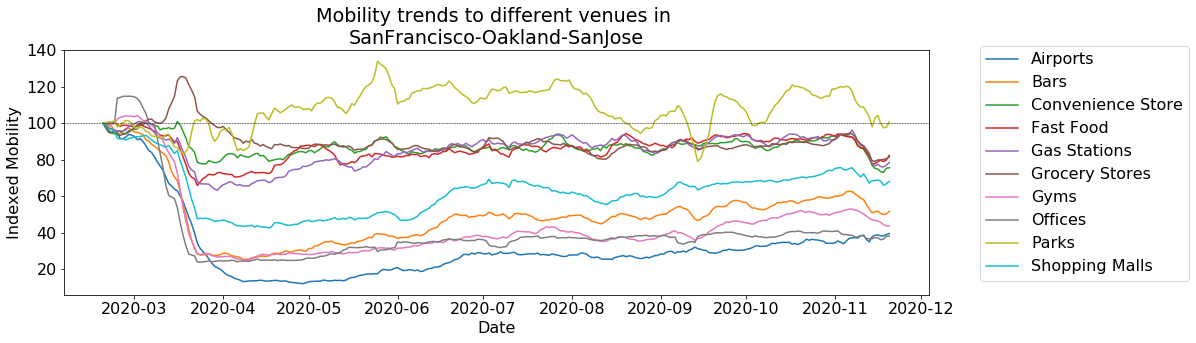

In [14]:
mobility_venues_foursquare(df_foursquare_dma, location)

#### --> Focus in restaurants close to: Offices, Airports, Gyms.

#### Using Google Data

Check both datasets. In case that one of them is incomplete, we use the other one. For instances, Foursquare doesn't have data from pharmacies in San Francisco, but Google it does.

In [15]:
df_google = pd.read_csv('../data/interim/mobility/google_counties.csv', index_col=0)

In [16]:
location = 'San Francisco County'

In [17]:
def mobility_venues_google(df, location):
    df = df[df.NAME == location]
    df1 = pd.melt(df, id_vars=['NAME', 'category'], var_name='Date')
    df1.Date = pd.to_datetime(df1.Date)
    temp = df1.groupby('category').count().reset_index()

    max_data = max(temp['value'])
    #only display historical data with 80% of the longer serie
    valid_venues = list(temp[temp['value'] >= 0.8*max_data]['category'])

    f, ax = plt.subplots(figsize=(15.5, 4.5))

    for venue in valid_venues:
        temp = df1[df1['category'] == venue]
        _ = sns.lineplot(data=temp, label=venue, y='value', x='Date')

    _ = ax.legend(bbox_to_anchor=(1.05, 1.05))
    _ = plt.rcParams.update({'font.size': 16})
    _ = plt.axhline(y=0, color='k', linestyle='--', label='Baseline', lw=0.5)
    _ = plt.xlabel('Date')
    _ = plt.ylabel('Indexed Mobility')
    _ = plt.title('Mobility trends to different venues in \n'+location)   

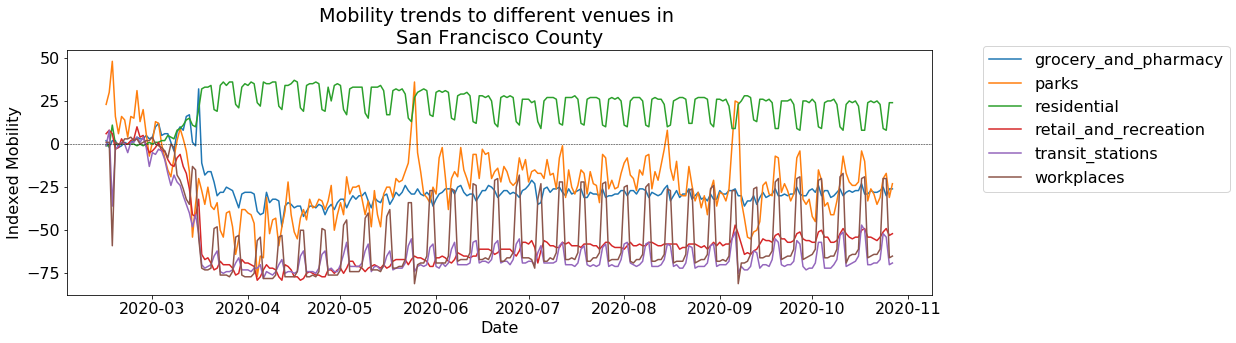

In [18]:
mobility_venues_google(df_google, location)

#### --> Focus in workplaces, transit_stations and retail and recreation

## 3. Apple mobility: walking, driving and transit

In [19]:
df_apple = pd.read_csv('../data/interim/mobility/apple_mobility_cities.csv', index_col=0)

In [20]:
df_apple_sf = df_apple[df_apple.city == 'San Francisco - Bay Area']
df_apple_sf.head()

,date,drv,trn,wlk,city
3960,2020-01-13,100.00,100.00,100.00,San Francisco - Bay Area
3961,2020-01-14,104.21,101.59,106.46,San Francisco - Bay Area
3962,2020-01-15,106.18,104.05,98.83,San Francisco - Bay Area
3963,2020-01-16,106.36,97.69,74.53,San Francisco - Bay Area
3964,2020-01-17,122.64,115.19,99.76,San Francisco - Bay Area


In [21]:
df_apple_sf.date = pd.to_datetime(df_apple_sf.date)

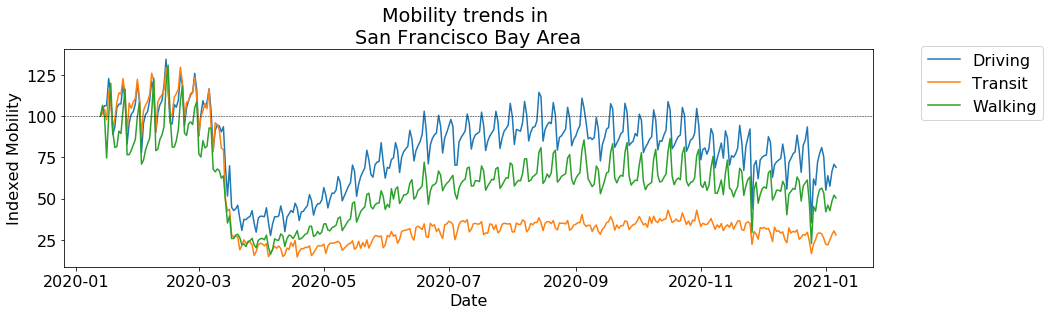

In [22]:
location = 'San Francisco Bay Area'
f, ax = plt.subplots(figsize=(14.5, 4))
_ = sns.lineplot(data=df_apple_sf, label='Driving', y='drv', x='date')
_ = sns.lineplot(data=df_apple_sf, label='Transit', y='trn', x='date')
_ = sns.lineplot(data=df_apple_sf, label='Walking', y='wlk', x='date')

_ = ax.legend(bbox_to_anchor=(1.05, 1.05))
_ = plt.rcParams.update({'font.size': 16})
_ = plt.axhline(y=100, color='k', linestyle='--', label='Baseline', lw=0.5)
_ = plt.xlabel('Date')
_ = plt.ylabel('Indexed Mobility')
_ = plt.title('Mobility trends in \n'+location)   